<a href="https://colab.research.google.com/github/RasikhTariq/hello-world/blob/main/k_meansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/MyDrive/Colab Notebooks/2025-PCA and K means/auto-mpg.csv'

import pandas as pd

df = pd.read_csv(file_path)

df


Mounted at /content/drive


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
df.isnull().sum()
# Find unique values in 'horsepower' that are not convertible to float
non_numeric_hp = df[~df['horsepower'].str.replace('.', '', 1).str.isnumeric()]['horsepower'].unique()
print("Non-numeric horsepower values:", non_numeric_hp)
import numpy as np

df['horsepower'].replace('?', np.nan, inplace=True)

df['horsepower'] = pd.to_numeric(df['horsepower'])

df.isnull().sum() # Checking the missing values again after replaces the ? with NaN
mean_hp = df['horsepower'].mean()
df['horsepower'].fillna(mean_hp, inplace=True)
df.isnull().sum()

Non-numeric horsepower values: ['?']


<ipython-input-2-543a092959e2>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(mean_hp, inplace=True)


,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [ ]:
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model year,int64
origin,int64
car name,object


In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [ ]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


Using unsupervised learning, can K-Means clustering identify meaningful clusters of cars that share similar characteristics in terms of miles per gallon (mpg), engine displacement, horsepower, and weight?

In [ ]:
pip install kneed

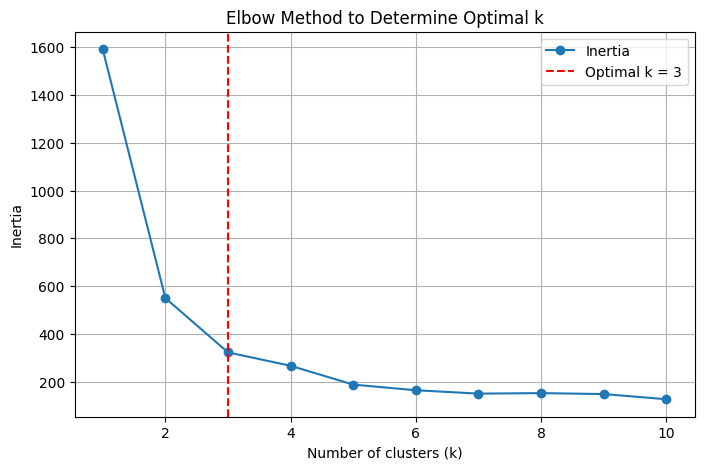

The optimal number of clusters (k) is: 3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator # To locate the optimal point.

# Select relevant features based upon the research question
features = ['mpg', 'displacement', 'horsepower', 'weight']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Automatically detect the "elbow" point using KneeLocator
knee = KneeLocator(k_range, inertia, curve='convex', direction='decreasing')
optimal_k = knee.knee

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', label='Inertia')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid(True)
plt.show()

print(f"The optimal number of clusters (k) is: {optimal_k}")


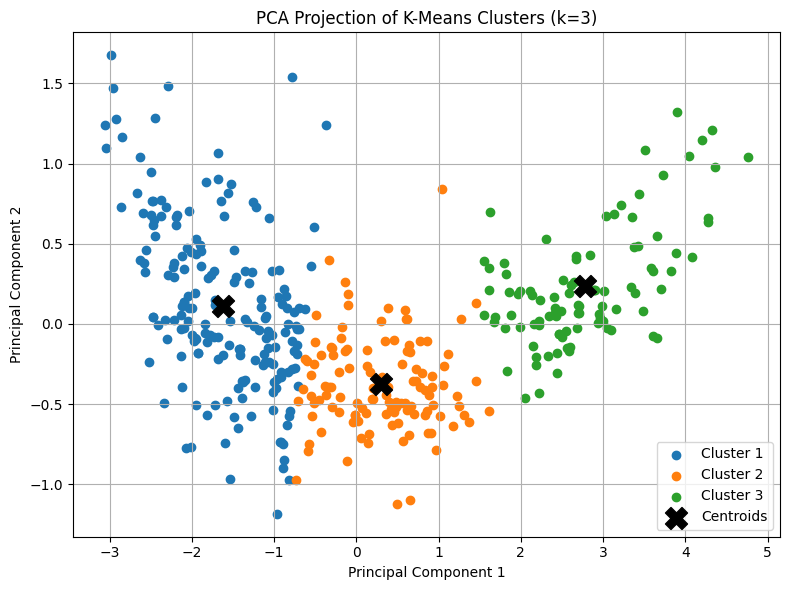

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['mpg', 'displacement', 'horsepower', 'weight']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 3 # Apply K-Means with k=3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2) # Apply PCA to reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6)) # Create a scatter plot of the PCA results with clusters
for cluster_id in range(k):
    plt.scatter(
        X_pca[clusters == cluster_id, 0],
        X_pca[clusters == cluster_id, 1],
        label=f'Cluster {cluster_id + 1}'
    )

centroids_pca = pca.transform(kmeans.cluster_centers_) # Plot centroids
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    s=250, c='black', marker='X', label='Centroids'
)

plt.title('PCA Projection of K-Means Clusters (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


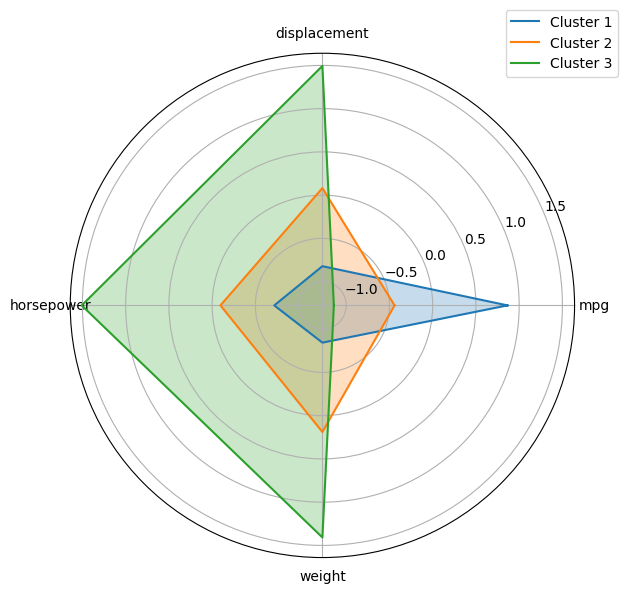

In [ ]:
df['cluster'] = kmeans.fit_predict(X_scaled)

cluster_centers_scaled = kmeans.cluster_centers_

# Radar plot setup
labels = features
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # repeat first angle to close the circle

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

for i in range(3):
    values = cluster_centers_scaled[i].tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {i+1}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.tight_layout()
plt.show()

Conclusion: Yes, K-Means clustering was able to identify three distinct clusters of vehicles based on their technical specifications, as shown in the radar plot. The standardized feature profiles of the clusters reveal clear patterns that correspond to different types of vehicle performance and design:

Cluster 1 is characterized by high fuel efficiency (mpg) and low values for displacement, horsepower, and weight. This group likely represents lightweight, fuel-efficient cars, such as compact or economy models.

Cluster 2 shows moderate values across all features, indicating a group of balanced vehicles that are neither highly fuel-efficient nor overly powerful. These could correspond to mid-sized or general-purpose vehicles.

Cluster 3 exhibits high displacement, horsepower, and weight, coupled with low mpg, indicating high-performance or heavy-duty vehicles, such as trucks, SUVs, or muscle cars.



Bonus activity: Hierarchical clustering is an unsupervised machine learning algorithm that groups data into a tree of nested clusters. The main types include agglomerative and divisive. Hierarchical cluster analysis helps find patterns and connections in datasets. Results are presented in a dendrogram diagram showing the distance relationships between clusters.

Reference: https://www.ibm.com/think/topics/hierarchical-clustering

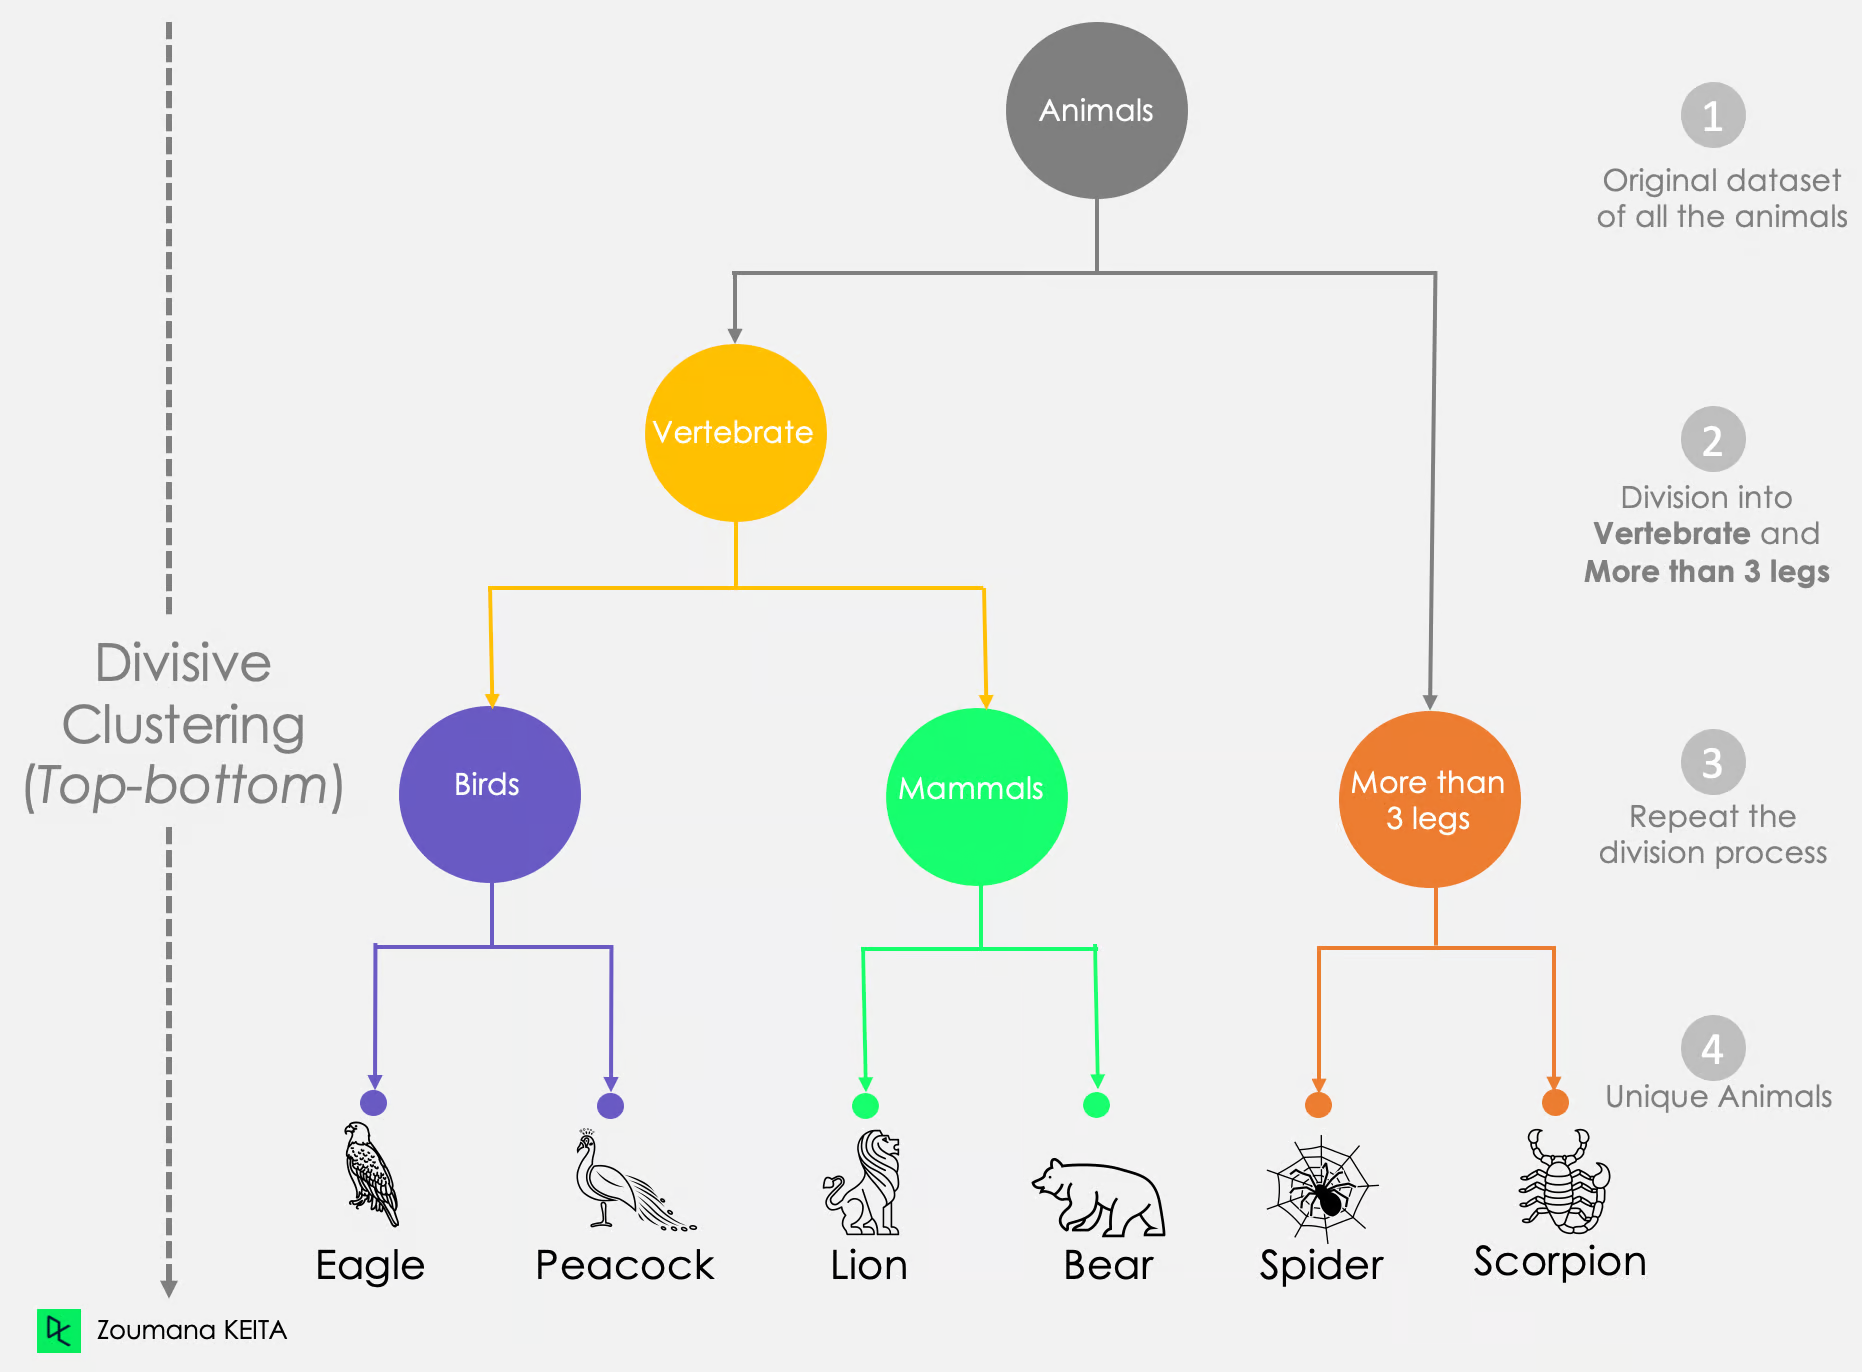

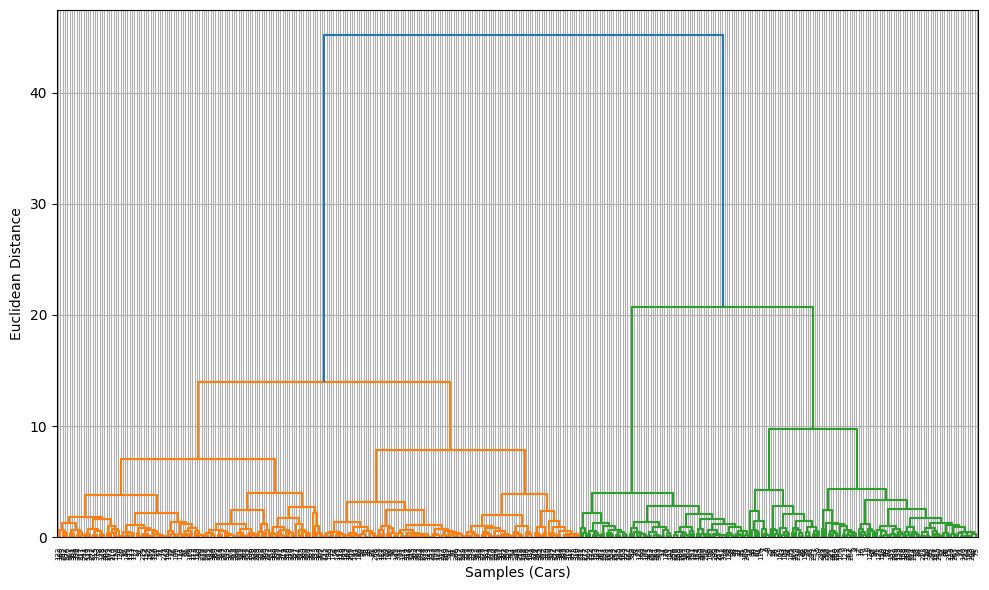

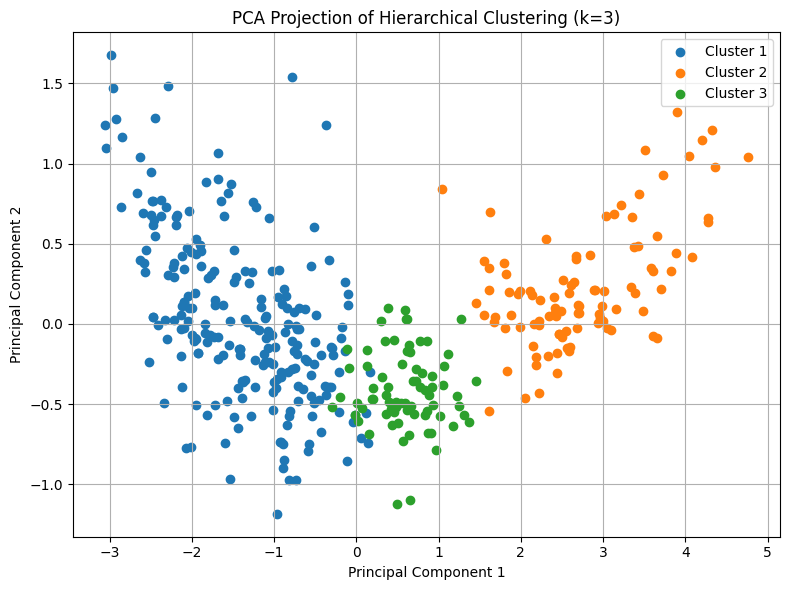

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

features = ['mpg', 'displacement', 'horsepower', 'weight']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.xlabel('Samples (Cars)')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.tight_layout()
plt.show()

# Three clusters (previous elbow method)
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['cluster_hierarchical'] = hc.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the clusters
plt.figure(figsize=(8, 6))
for cluster_id in range(3):
    plt.scatter(
        X_pca[df['cluster_hierarchical'] == cluster_id, 0],
        X_pca[df['cluster_hierarchical'] == cluster_id, 1],
        label=f'Cluster {cluster_id + 1}'
    )

plt.title('PCA Projection of Hierarchical Clustering (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
